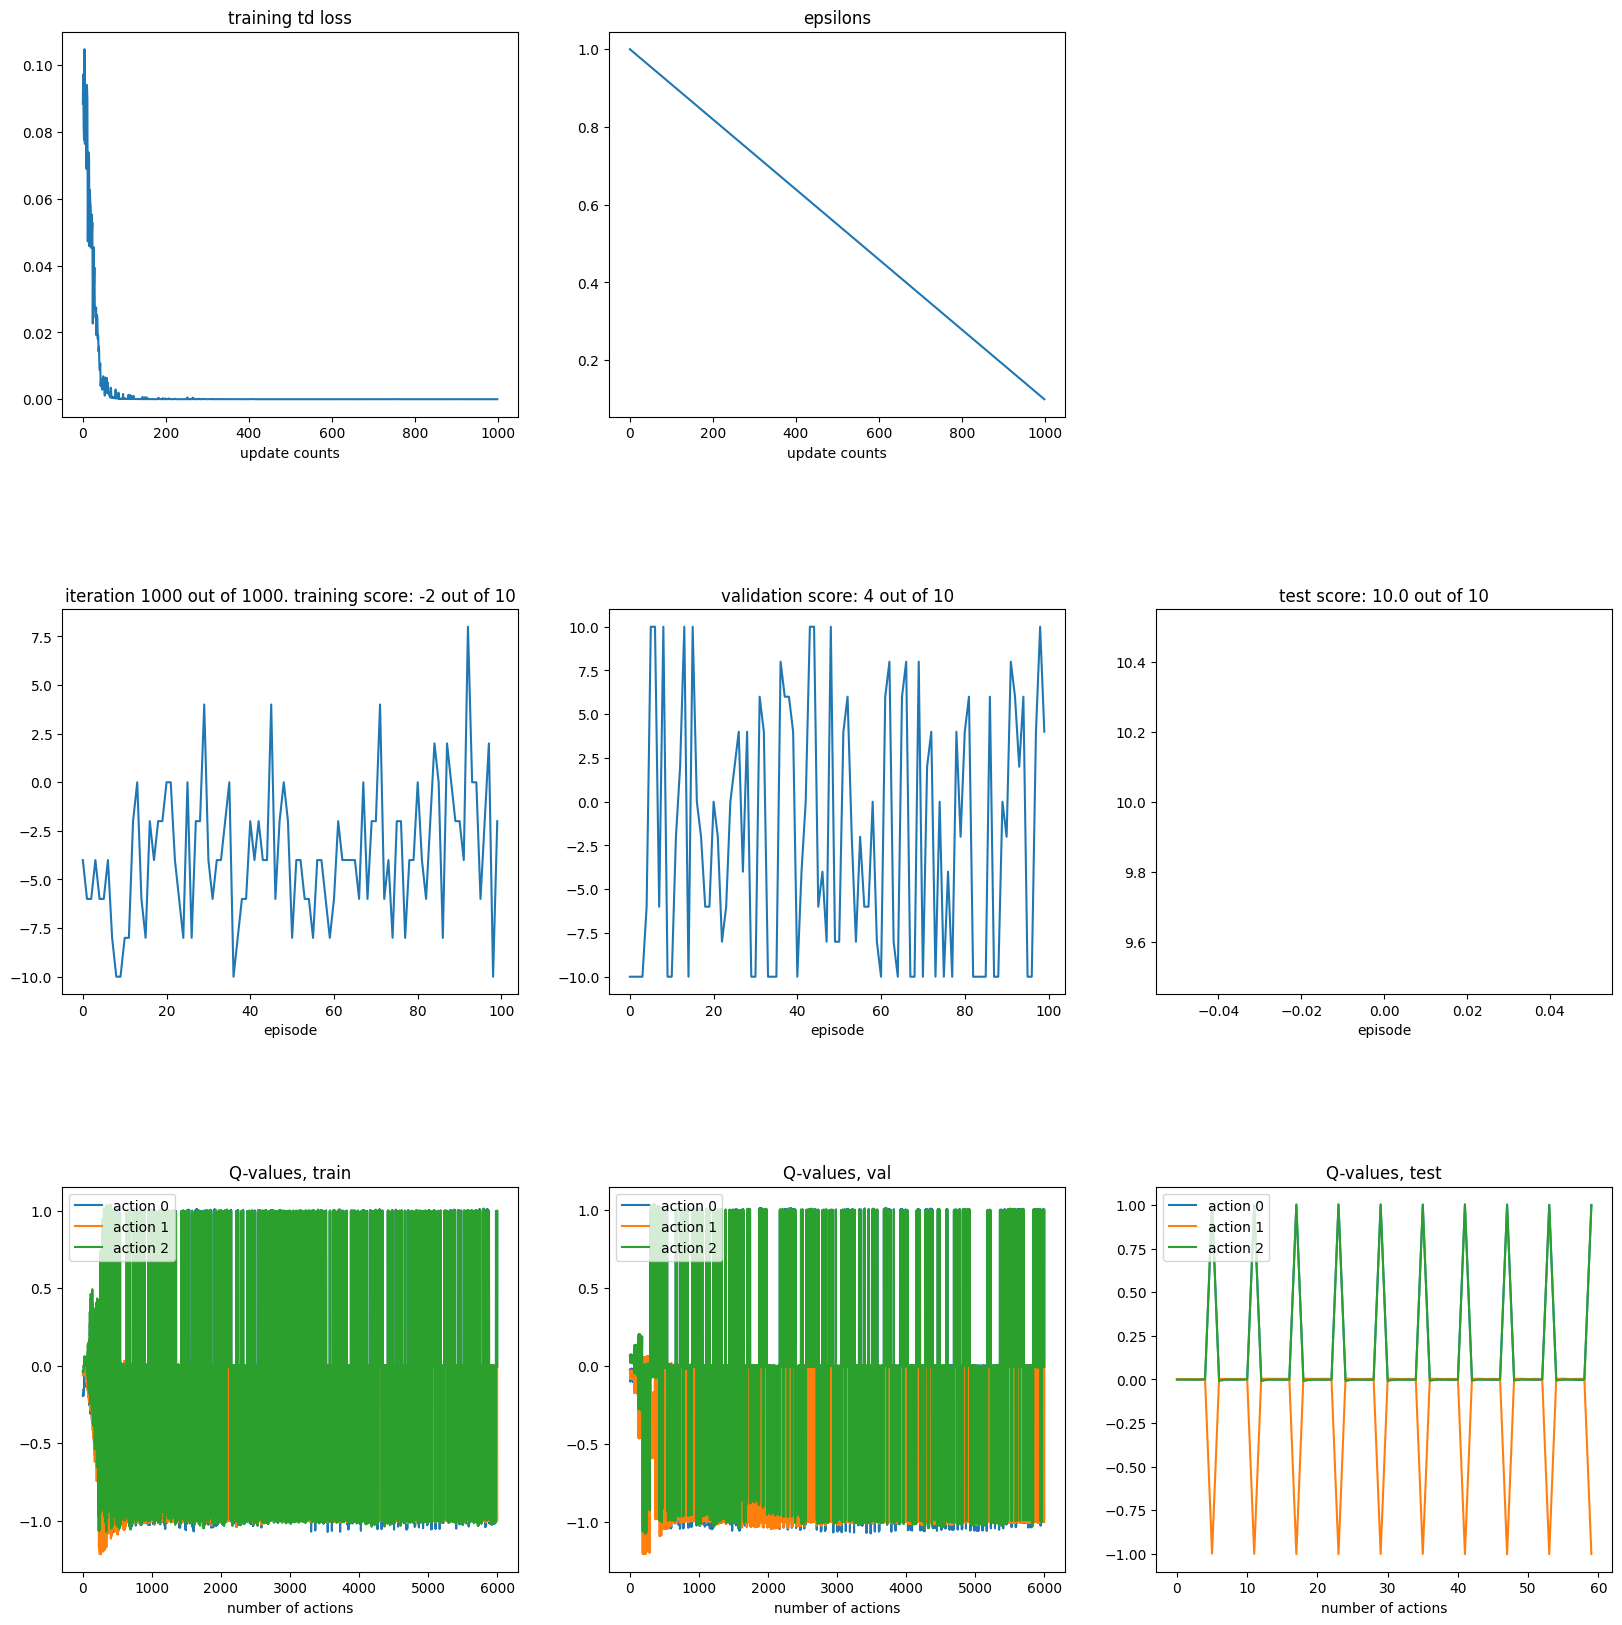

In [1]:
%matplotlib inline
import logging

logger = logging.getLogger()
logger.disabled = True

import random

from copy import deepcopy
from tqdm.auto import tqdm
from agent.dqn import DQNMMAgent

room_size = "xxs"

capacity = {
    "episodic": 0,
    "episodic_agent": 0,
    "semantic": 1,
    "semantic_map": 0,
    "short": 1,
}

config = {
    "question_prob": 1.0,
    "terminates_at": 9,
    "randomize_observations": False,
    "room_size": room_size,
    "rewards": {"correct": 1, "wrong": -1, "partial": -1},
    "make_everything_static": False,
    "num_total_questions": 10,
    "question_interval": 1,
    "include_walls_in_observations": True,
}


params = {
    "env_str": "room_env:RoomEnv-v2",
    "max_epsilon": 1.0,
    "min_epsilon": 0.1,
    "epsilon_decay_until": 10 * 100,
    "gamma": 0,
    "capacity": capacity,
    "nn_params": {
        "hidden_size": 64,
        "num_layers": 2,
        "embedding_dim": 64,
        "v1_params": None,
        "v2_params": {},
        "memory_of_interest": [
            # "episodic",
            "semantic",
            "short",
        ],
        "fuse_information": "sum",
        "include_positional_encoding": True,
        "max_timesteps": config["terminates_at"] + 1,
        "max_strength": config["terminates_at"] + 1,
    },
    "num_iterations": 10 * 100,
    "replay_buffer_size": 10 * 100,
    "warm_start": 10 * 10,
    "batch_size": 64,
    "target_update_interval": 10,
    "pretrain_semantic": False,
    "run_test": True,
    "num_samples_for_results": 10,
    "train_seed": 5,
    "plotting_interval": 10,
    "device": "cpu",
    "test_seed": 0,
    "qa_policy": "episodic_semantic",
    "explore_policy": "avoid_walls",
    "env_config": config,
    "ddqn": True,
    "dueling_dqn": True,
    "split_reward_training": False,
    "default_root_dir": "./training_results/xxs/",
    "run_handcrafted_baselines": [
        {"mm": mm, "qa": qa, "explore": explore, "pretrain_semantic": pretrain_semantic}
        for mm in ["random", "episodic", "semantic"]
        for qa in ["semantic", "episodic_semantic"]
        for explore in ["random", "avoid_walls"]
        for pretrain_semantic in [False]
    ],
}
agent = DQNMMAgent(**params)
agent.train()

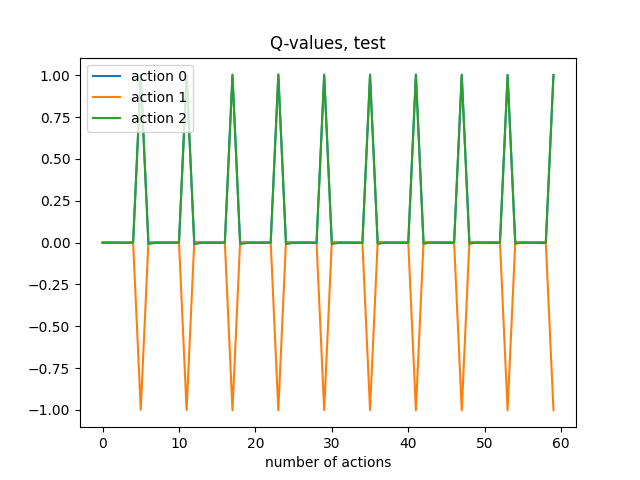

In [6]:
%matplotlib widget
from explicit_memory.utils import read_pickle

import matplotlib.pyplot as plt
plt.figure()
plt.title("Q-values, test");
for action_number in range(agent.dqn.n_actions):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=f"action {action_number}",
    )
plt.legend(loc="upper left");
plt.xlabel("number of actions");

These q values make sense. There are 6 observations:

1. north
2. east
3. south 
4. west 
5. sta 
6. agent (this is where the reward +1 comes)

Note that the q values of the action 0 and action 2 are almost identical so that's why you can't see the q values for action 0

The optimal q value for the state and action is q = 1 + (0.0)^1* 0 + (0.0)^2* 0 + (0.0)^3* 0 + (0.0)^4* 0 + (0.0)^5* 0 + (0.0)^6* 1 + ... = 1

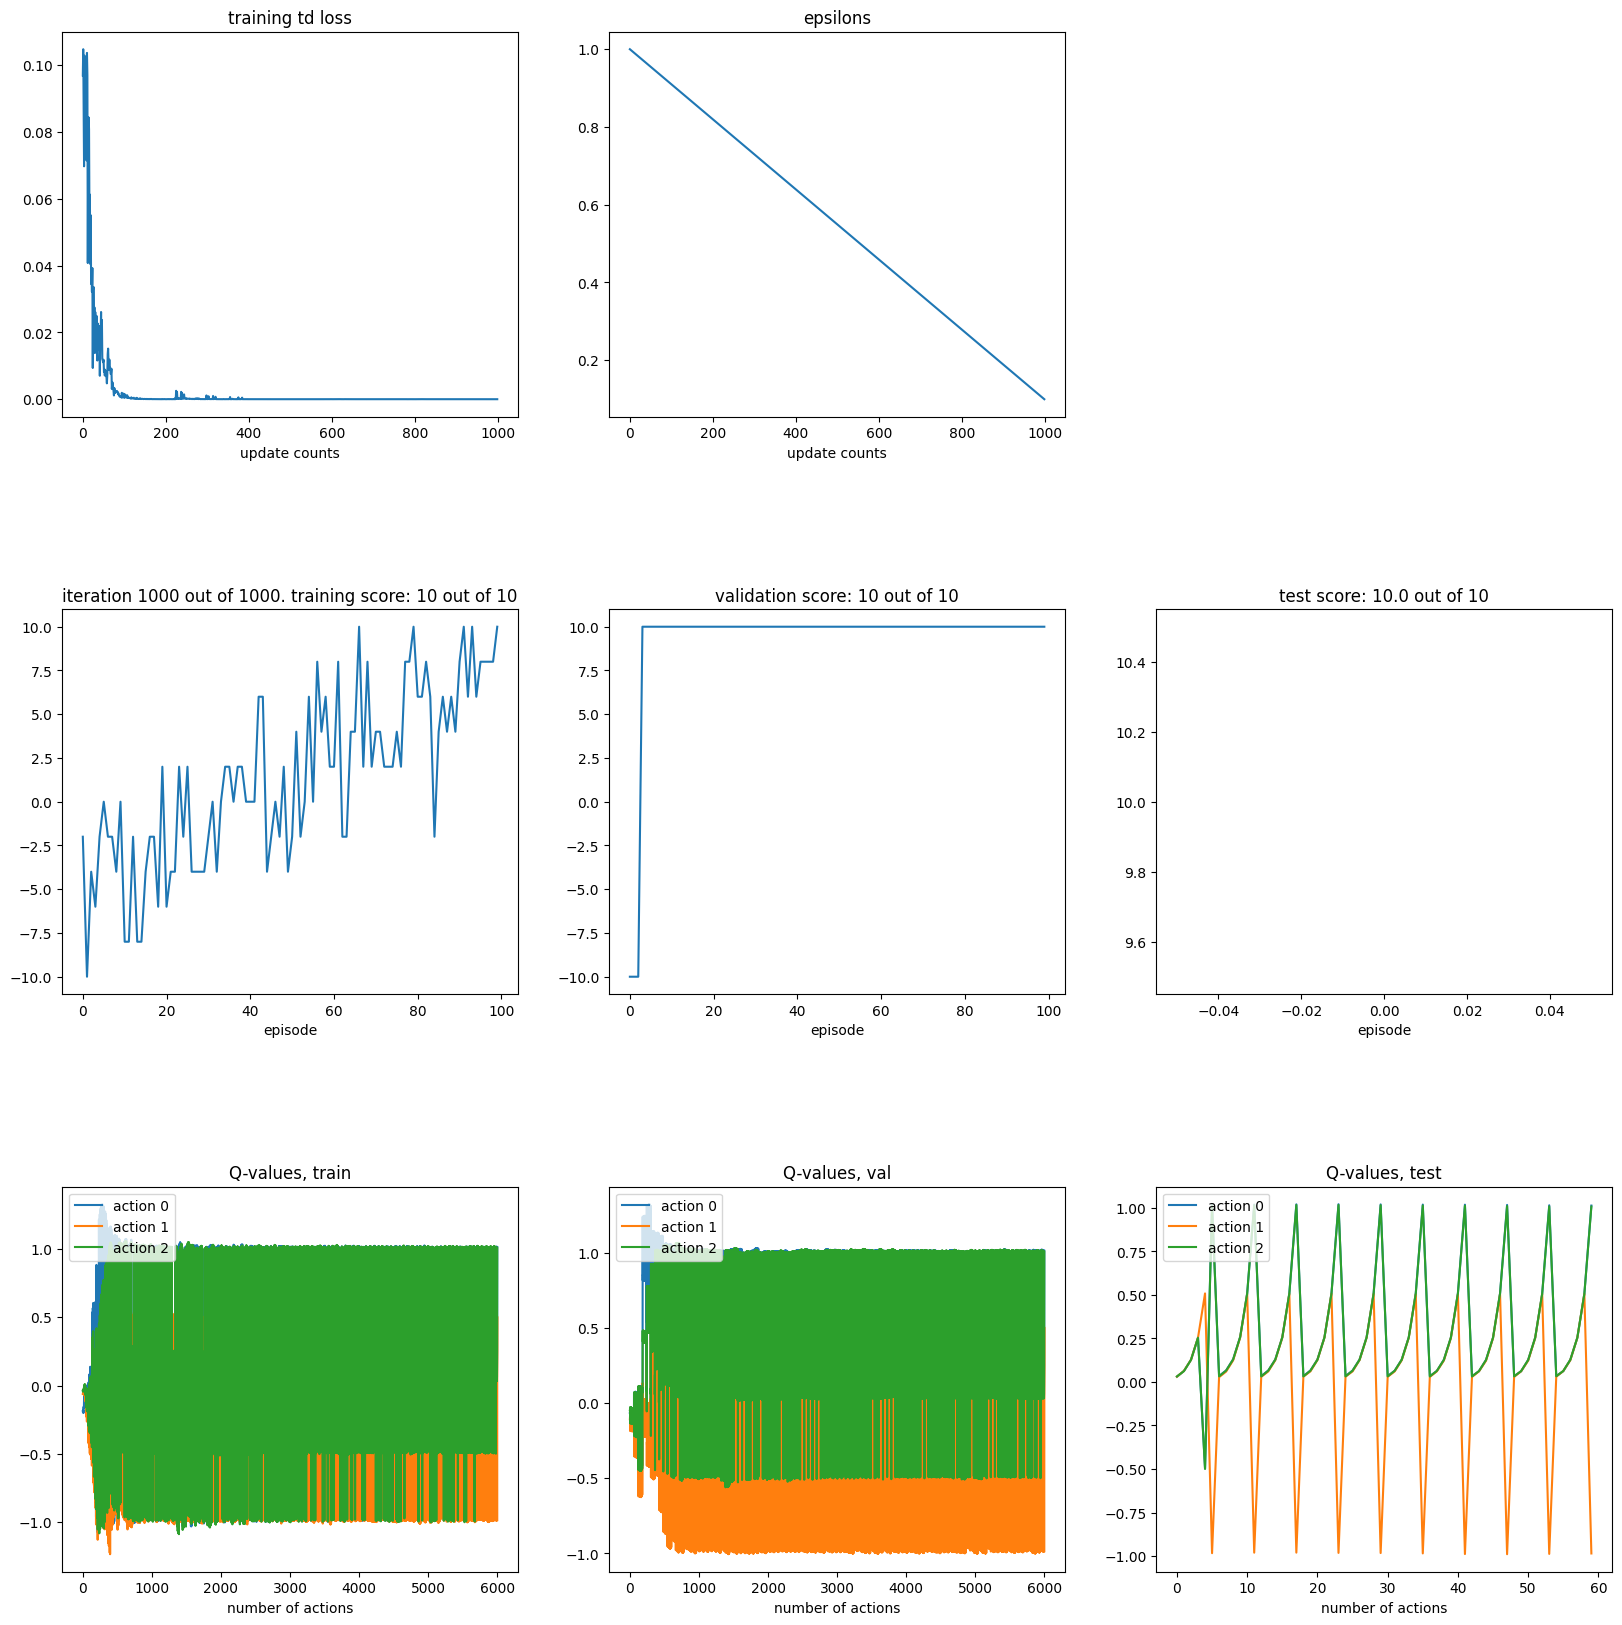

In [8]:
%matplotlib inline
params["gamma"] = 0.5
agent = DQNMMAgent(**params)
agent.train()

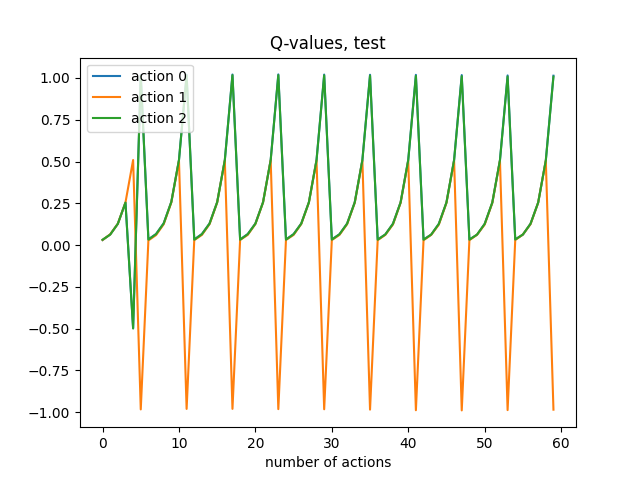

In [9]:
%matplotlib widget
from explicit_memory.utils import read_pickle

import matplotlib.pyplot as plt
plt.figure()
plt.title("Q-values, test");
for action_number in range(agent.dqn.n_actions):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=f"action {action_number}",
    )
plt.legend(loc="upper left");
plt.xlabel("number of actions");

The optimal q value for the state and action is q = 1 + (0.5)^1* 0 + (0.5)^2* 0 + (0.5)^3* 0 + (0.5)^4* 0 + (0.5)^5* 0 + (0.5)^6* 1 + ... = 1.015 in the beginning, and it starts to decline.

Since 0.5^6 = 0.015

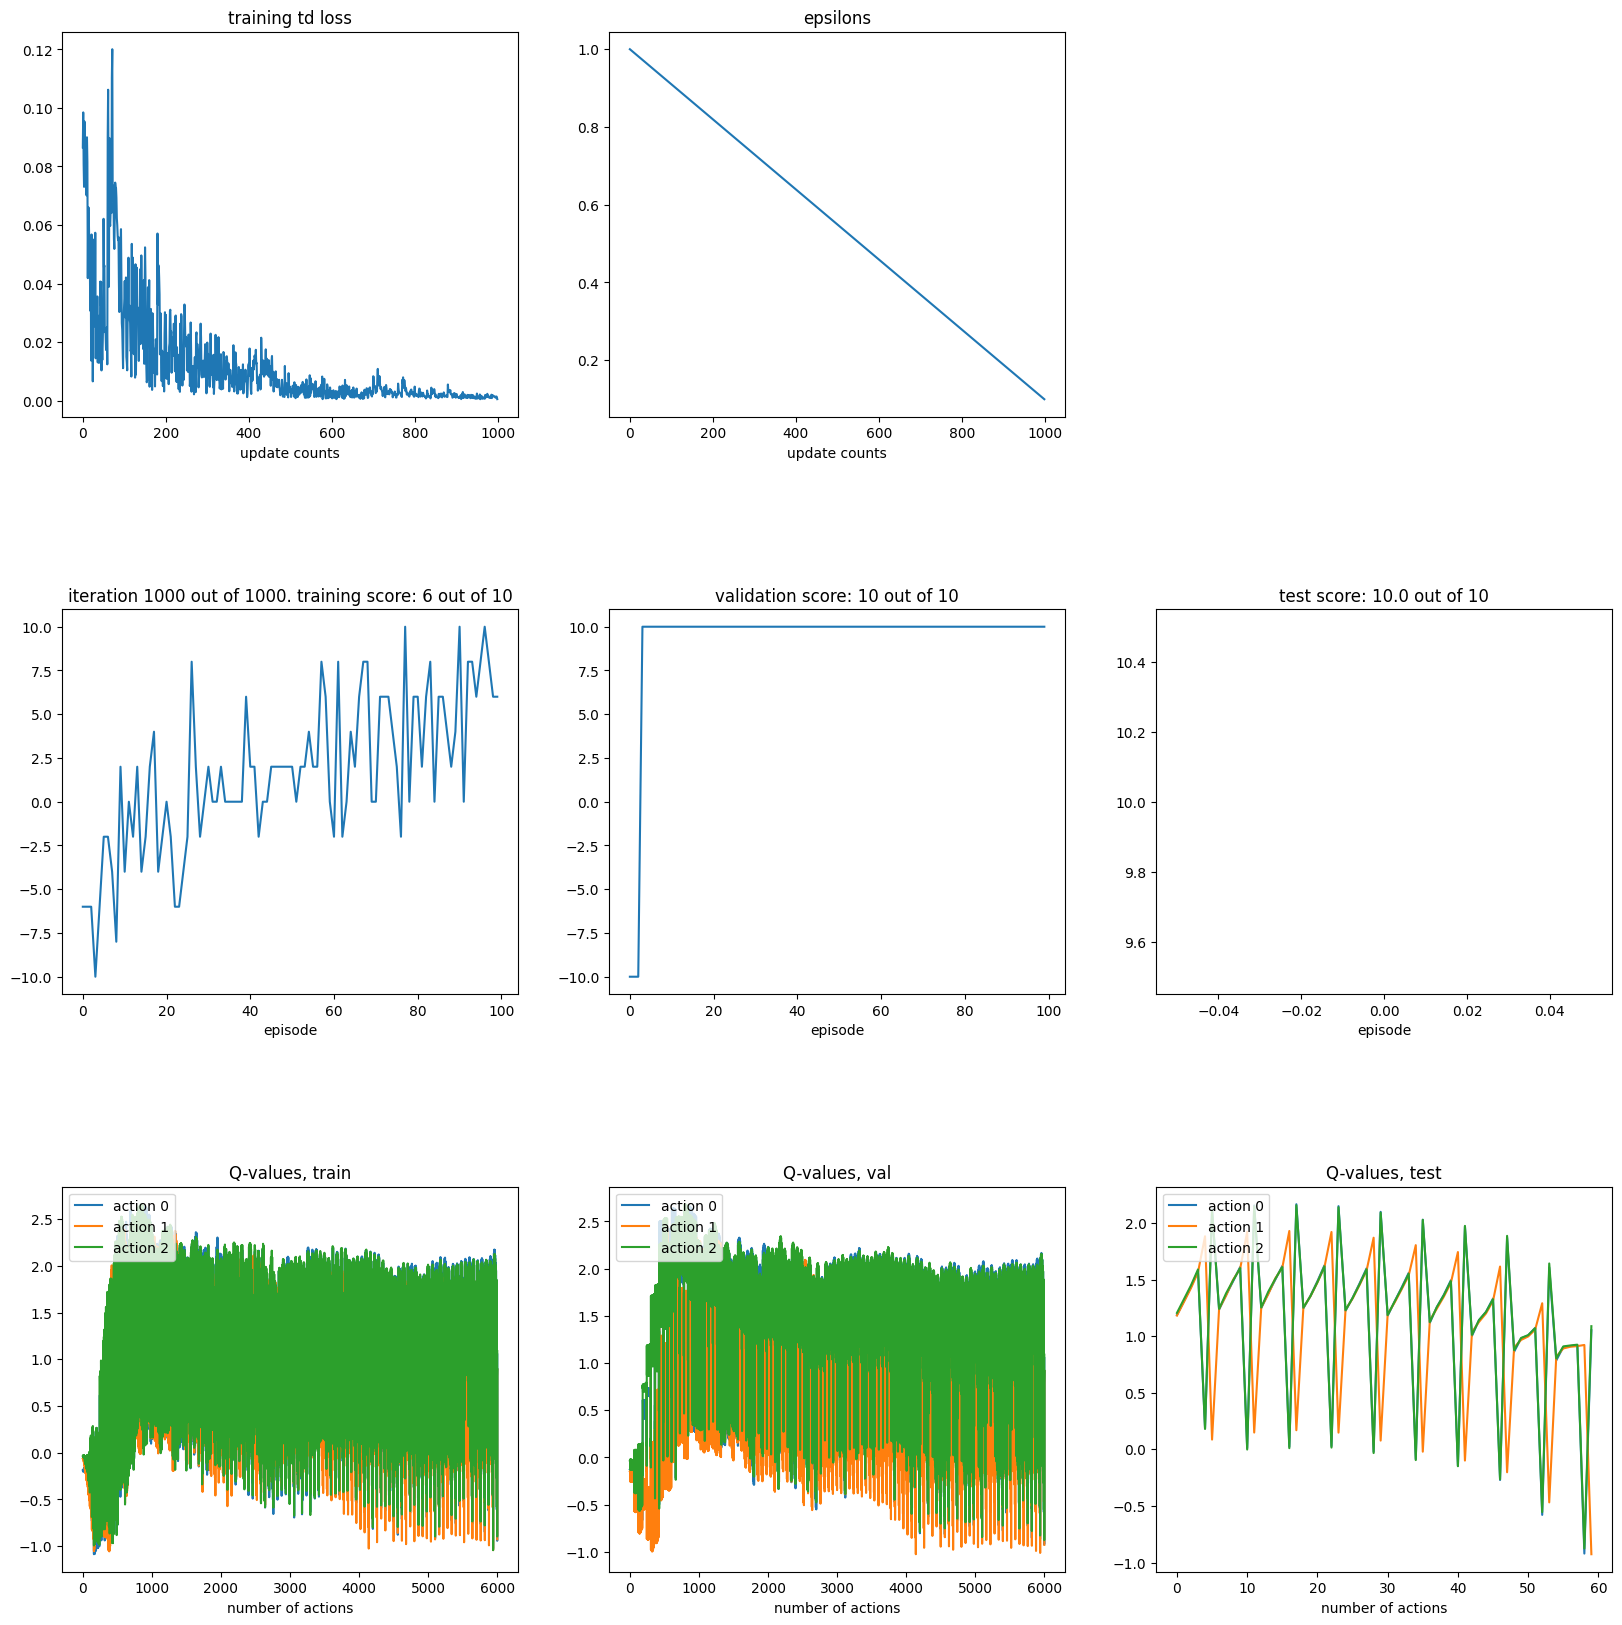

In [12]:
%matplotlib inline
params["gamma"] = 0.9
agent = DQNMMAgent(**params)
agent.train()

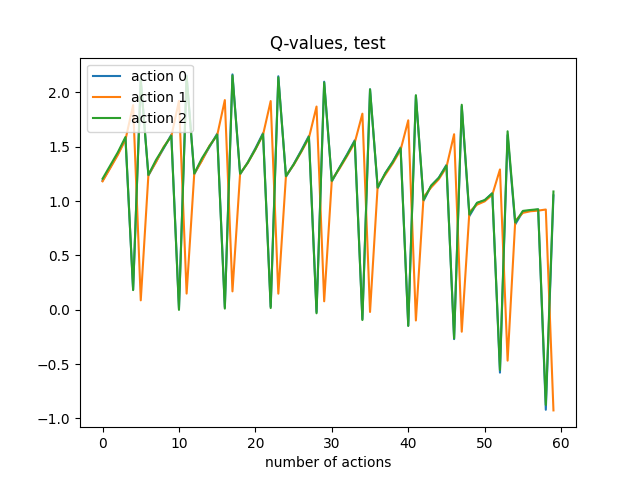

In [13]:
%matplotlib widget
from explicit_memory.utils import read_pickle

import matplotlib.pyplot as plt
plt.figure()
plt.title("Q-values, test");
for action_number in range(agent.dqn.n_actions):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=f"action {action_number}",
    )
plt.legend(loc="upper left");
plt.xlabel("number of actions");

The optimal q value for the state and action is q = 1 + (0.9)^1* 0 + (0.9)^2* 0 + (0.9)^3* 0 + (0.9)^4* 0 + (0.9)^5* 0 + (0.9)^6* 1 + ... =  1 / (1-0.531) = 2.132 in the beginning, and it starts to decline.

Since 0.9^6 = 0.531

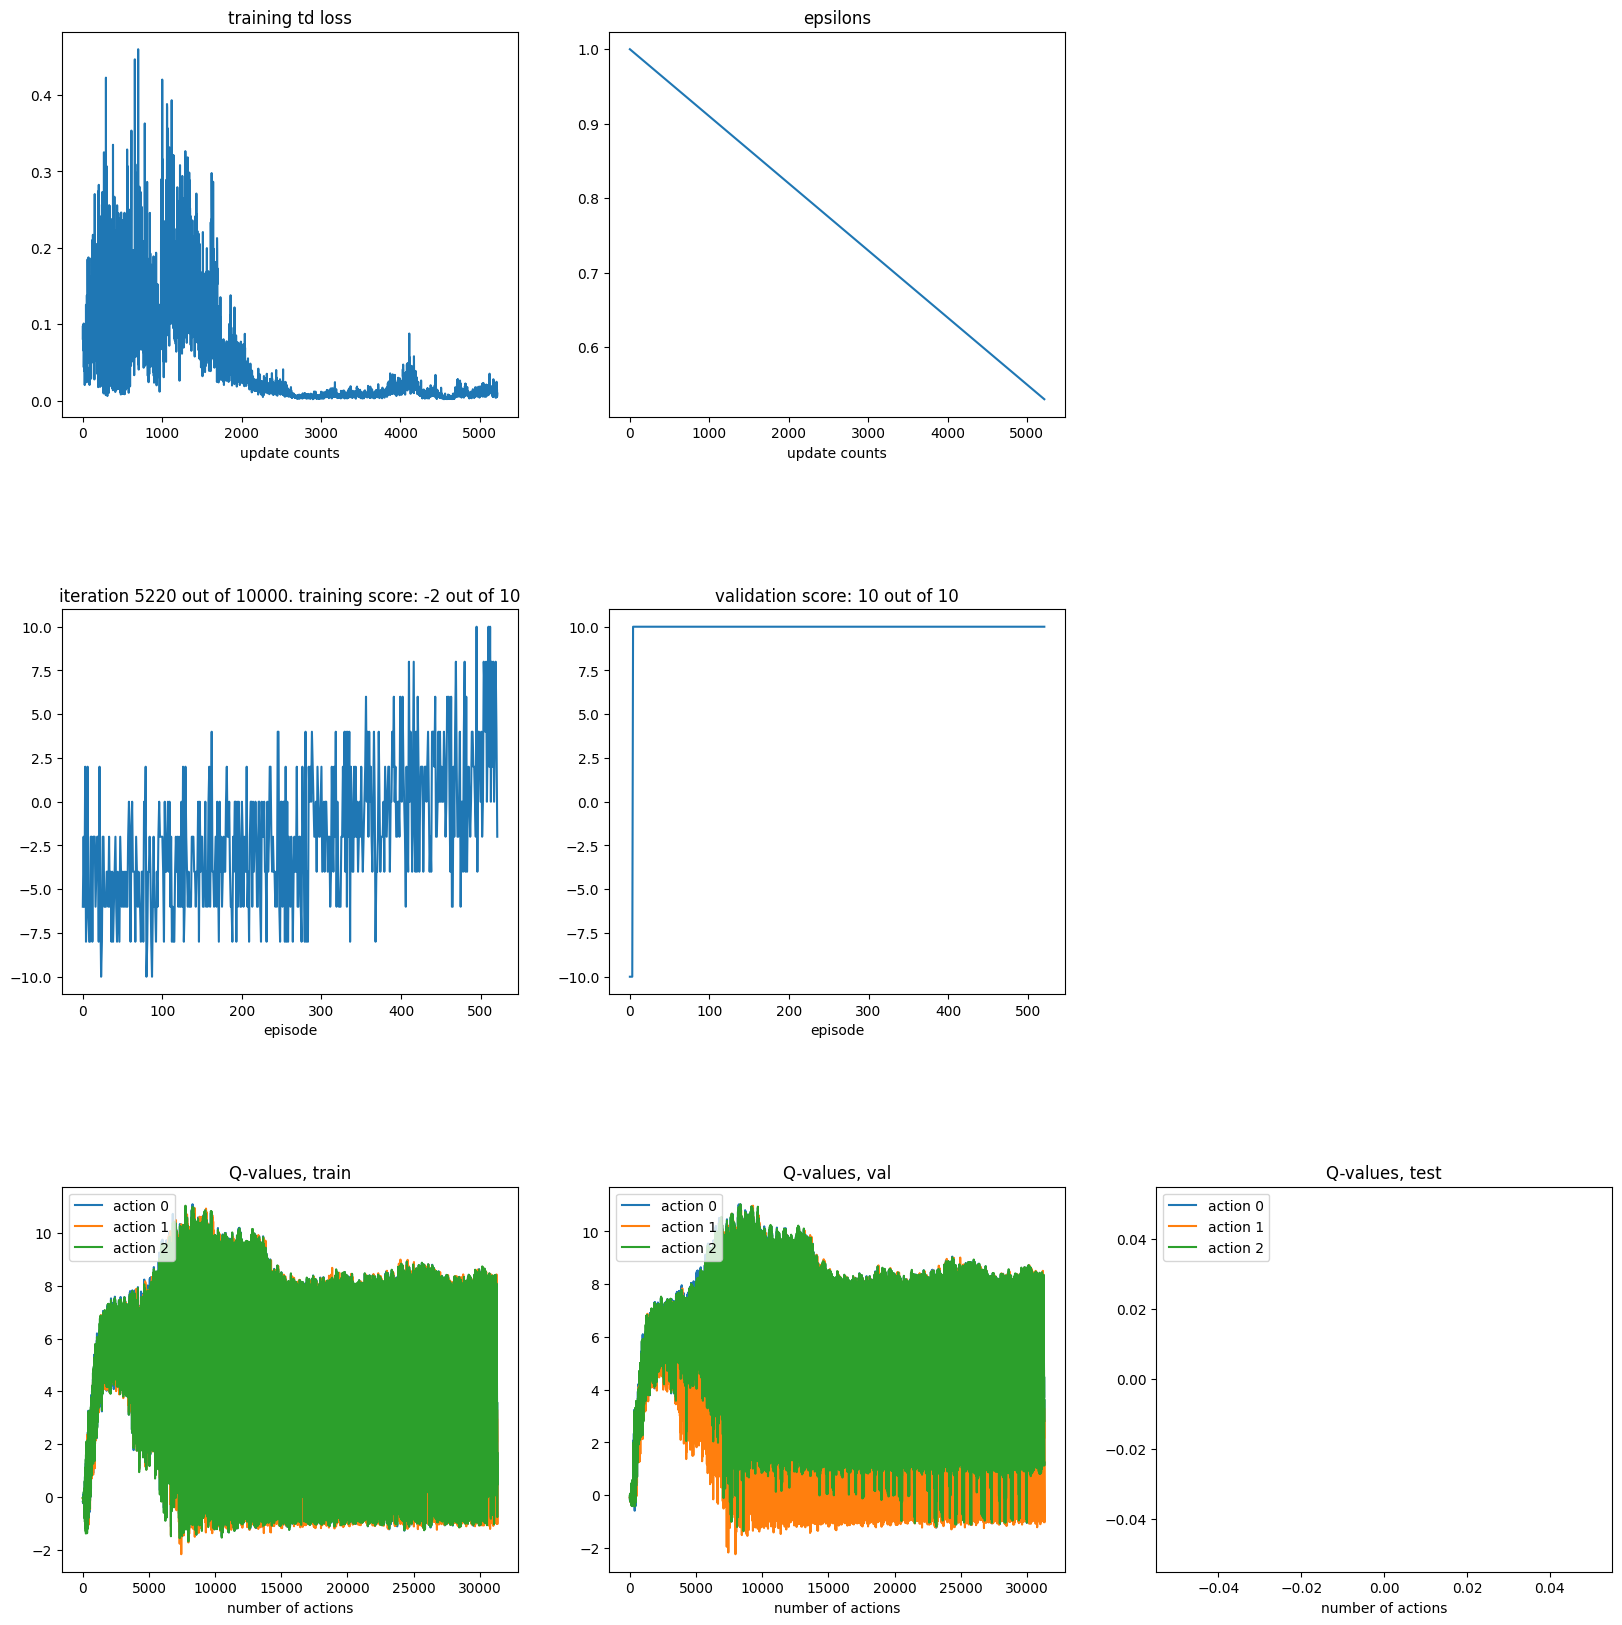

/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.total_maximum_episode_rewards to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.total_maximum_episode_rewards` for environment variables or `env.get_wrapper_attr('total_maximum_episode_rewards')` that will search the reminding wrappers.
  logger.warn(


In [18]:
%matplotlib inline
params["gamma"] = 0.99

# we need a longer training time to see the effect of gamma
params["epsilon_decay_until"] = 10* 1000
params["num_iterations"] = 10* 1000
params["replay_buffer_size"] = 10* 1000

agent = DQNMMAgent(**params)
agent.train()

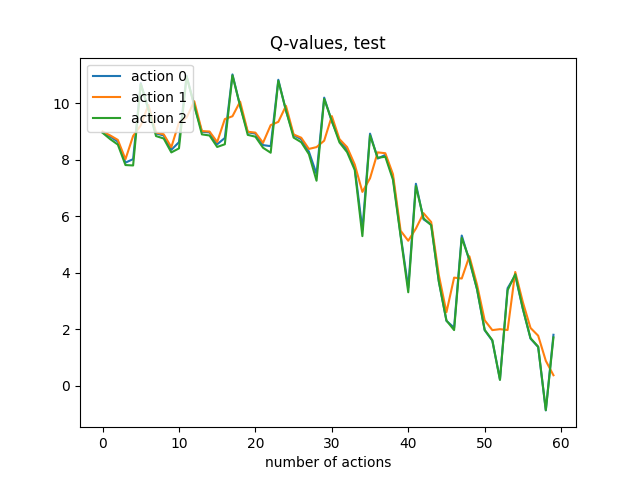

In [ ]:
%matplotlib widget
from explicit_memory.utils import read_pickle

import matplotlib.pyplot as plt
plt.figure()
plt.title("Q-values, test");
for action_number in range(agent.dqn.n_actions):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=f"action {action_number}",
    )
plt.legend(loc="upper left");
plt.xlabel("number of actions");

The optimal q value for the state and action is q = 1 + (0.99)^1* 0 + (0.99)^2* 0 + (0.99)^3* 0 + (0.99)^4* 0 + (0.99)^5* 0 + (0.99)^6* 1 + ... =  1 / (1-0.941480149401) = 17.08 in the beginning, and it starts to decline.

Since 0.99^6 = 0.941